In [1]:
# numerical / scientific
import numpy as np
import torch
import gpytorch as gp

# data
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf

# plotting
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 5)

# misc
import datetime
from typing import Tuple
from tqdm import tqdm

# utility imports
from utilities.processing_utility import get_q_2_cw_data 
from utilities.processing_utility import get_train_test_split

from strategies.buy_and_hold import buy_and_hold_strategy


In [2]:
df = get_q_2_cw_data()

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'S&P 500 adjusted closing price')

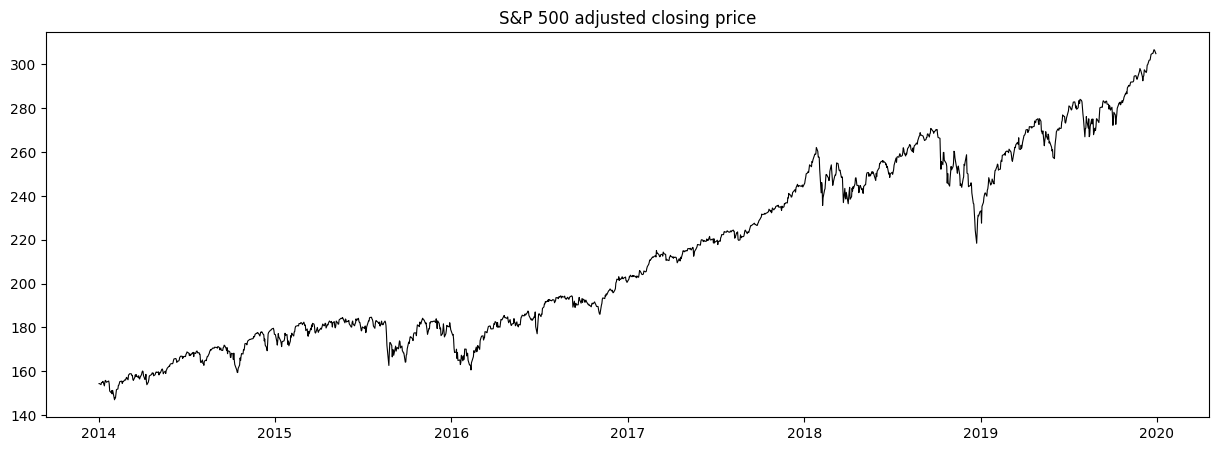

In [16]:
# plot S&P 500
plt.plot(df['adjusted_close_price'], color='black', lw=.8)
plt.title('S&P 500 adjusted closing price')

In [4]:
# get train test split
excess_return_data =df['normalised_excess_returns'].to_numpy()
price_data = df['adjusted_close_price'].to_numpy()

_, p_train, _, p_test = get_train_test_split(
    x_data = excess_return_data,
    y_data = price_data,
    split = 0.7,)

# spint an x_range
_range = np.arange(0, len(price_data))
train_range = _range[:len(p_train)]
test_range = _range[len(p_train):]

Text(0.5, 1.0, 'S&P 500 adjusted closing price')

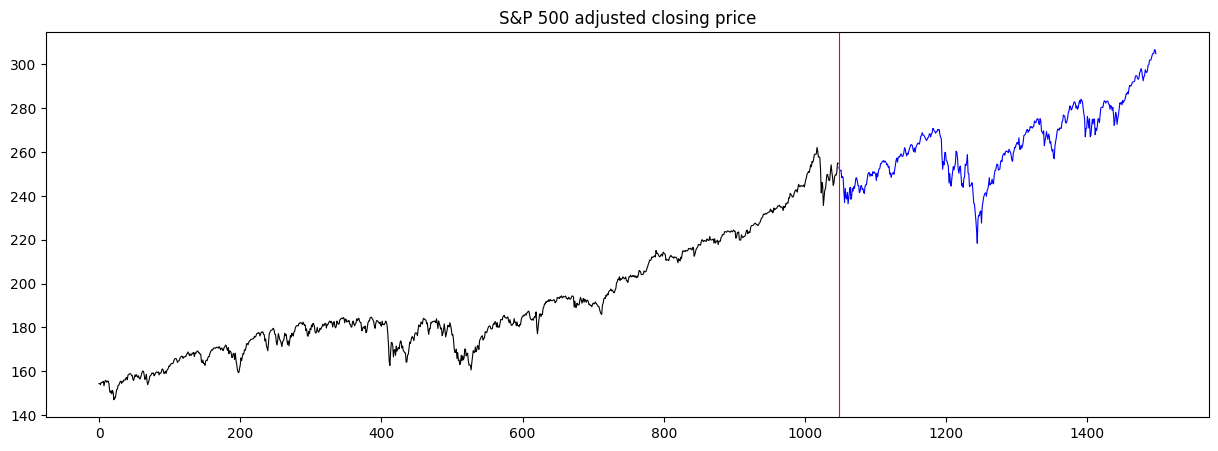

In [5]:
# plot train and test data
plt.plot(train_range, p_train, color = 'black', lw = 0.8, alpha = 1)
plt.plot(test_range, p_test, color='blue', lw = 0.8, alpha = 1)
plt.axvline(x = len(p_train), color = 'red', lw = 0.8, alpha = 1)
plt.title('S&P 500 adjusted closing price')

In [6]:
# strategy on training set
initial_cash = 1.

# strategy on training set
strategy_returns_train = buy_and_hold_strategy(
    price_series = p_train,
    initial_cash = initial_cash,
)

# strategy on test set
strategy_returns_test = buy_and_hold_strategy(
    price_series = p_test,
    initial_cash = initial_cash,
)

Text(0.5, 1.0, 'Buy and hold strategy on training set')

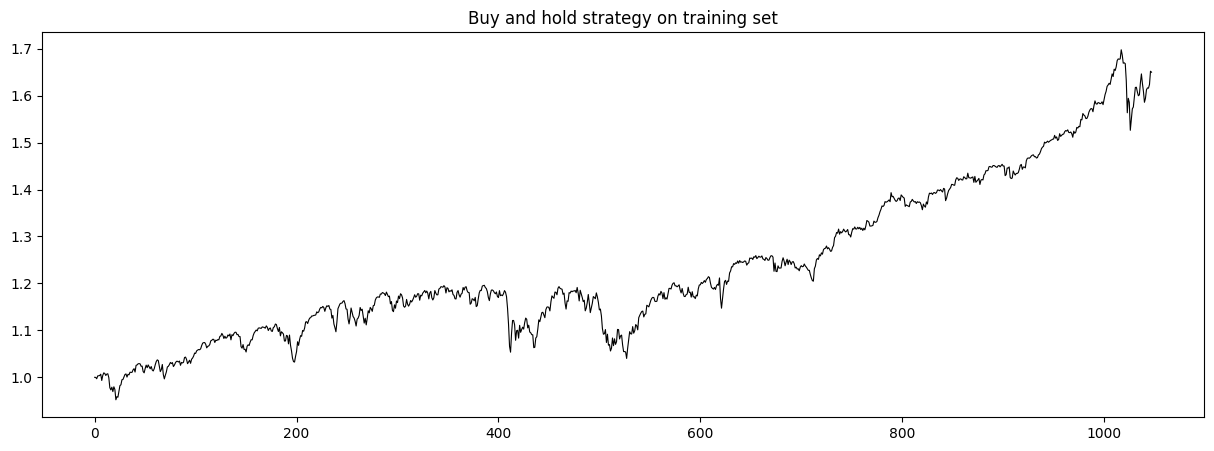

In [15]:
plt.plot(train_range, strategy_returns_train, color = 'black', lw = 0.8, alpha = 1)
plt.title('Buy and hold strategy on training set')

Text(0.5, 1.0, 'Buy and hold strategy on test set')

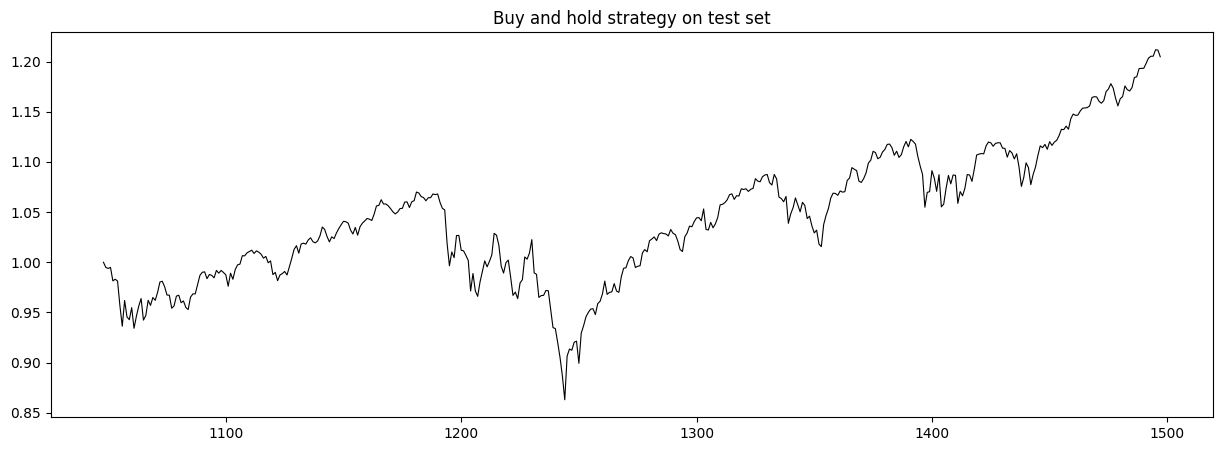

In [14]:
plt.plot(test_range, strategy_returns_test, color = 'black', lw = 0.8, alpha = 1)
plt.title('Buy and hold strategy on test set')